In [ ]:
import os
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [2]:
# Folder path
folder_path = "Datasets"

# Company name mapping
company_names = {
    "ADEL.csv": "Adani Enterprises",
    "HDBK.csv": "HDFC Bank",
    "INFY.csv": "Infosys",
    "TISC.csv": "Tata Steel",
    "RELI.csv": "Reliance Industries",
    "NEST.csv": "Nestle India",
    "CIPL.csv": "Cipla",
    "HIAE.csv": "Hindustan Aeronautics Limited"
}

# Loop through files
for filename in os.listdir(folder_path):
    if filename.endswith(".csv") and filename in company_names:
        
        company = company_names[filename]
        file_path = os.path.join(folder_path, filename)
        
        df = pd.read_csv(file_path)
        
        print(f"\n\n------------ Company: {company} ------------\n")
        print(df.head(5))



------------ Company: Adani Enterprises ------------

         Date     Price      Open      High       Low     Vol. Change %
0  18-12-2025  2,229.90  2,236.40  2,245.00  2,211.20  501.82K   -0.12%
1  17-12-2025  2,232.50  2,247.60  2,255.00  2,221.00  651.51K   -0.69%
2  16-12-2025  2,247.90  2,270.00  2,276.80  2,232.10  654.71K   -1.36%
3  15-12-2025  2,278.90  2,282.40  2,300.00  2,273.00  573.03K   -0.15%
4  12-12-2025  2,282.40  2,277.70  2,296.80  2,270.20  929.20K    0.21%


------------ Company: Cipla ------------

         Date     Price      Open      High       Low     Vol. Change %
0  18-12-2025  1,496.90  1,494.80  1,511.00  1,494.00  974.09K    0.00%
1  17-12-2025  1,496.90  1,497.60  1,505.30  1,491.00    1.00M   -0.18%
2  16-12-2025  1,499.60  1,500.00  1,508.90  1,496.10  789.49K   -0.56%
3  15-12-2025  1,508.00  1,505.00  1,515.50  1,498.00  855.51K   -0.62%
4  12-12-2025  1,517.40  1,520.00  1,524.70  1,510.20    1.05M    0.34%


------------ Company: HDFC Bank --

In [3]:
def convert_volume(vol):
    
    # If volume is missing, return NaN
    if pd.isna(vol):
        return np.nan
    
    # Convert to string and clean commas/spaces
    vol = str(vol)
    vol = vol.replace(",", "")
    vol = vol.strip()
    
    # Convert based on suffix
    if vol.endswith("K"):
        number = float(vol[:-1])
        return number * 1000
    
    elif vol.endswith("M"):
        number = float(vol[:-1])
        return number * 1000000
    
    elif vol.endswith("B"):
        number = float(vol[:-1])
        return number * 1000000000
    
    else:
        return float(vol)

all_stocks_data = {}

# Loop through all CSV files in the folder
for file in os.listdir(folder_path):
    
    # Only process files that exist in company list
    if file.endswith(".csv") and file in company_names:
        
        print("\nProcessing file:", file)
        
        # Create full file path
        file_path = os.path.join(folder_path, file)
        
        # Read CSV into DataFrame
        original_df = pd.read_csv(file_path)
        
        # Create a copy so original data is untouched
        df = original_df.copy()
        
        # Replace invalid dates *********
        df["Date"] = df["Date"].replace("*********", np.nan)
        
        # Convert to datetime format
        df["Date"] = pd.to_datetime(
            df["Date"],
            format="%d-%m-%Y",
            errors="coerce"
        )
        
        df = df.sort_values("Date")
        
        price_columns = ["Price", "Open", "High", "Low"]
        
        for col in price_columns:
            
            df[col] = df[col].astype(str)
            
            df[col] = df[col].str.replace(",", "")
 
            df[col] = pd.to_numeric(df[col], errors="coerce")
        
        df["Vol."] = df["Vol."].apply(convert_volume)
       
        df["Change %"] = df["Change %"].str.replace("%", "")
        df["Change %"] = df["Change %"].astype(float)
        df["Change %"] = df["Change %"] / 100
        
        df = df.sort_values("Date")
       
        company = company_names[file]
        all_stocks_data[company] = df
        
        print("\n------------ Company:", company, "------------\n")
        print(df.head(5).to_string(index=False))


print("\nAll stock datasets loaded & cleaned successfully!")


Processing file: ADEL.csv

------------ Company: Adani Enterprises ------------

      Date  Price  Open   High    Low      Vol.  Change %
2021-01-01 491.15 477.0 493.25 477.00 5040000.0    0.0242
2021-01-04 494.50 492.0 502.60 486.65 4940000.0    0.0068
2021-01-05 494.40 492.0 501.40 489.60 3650000.0   -0.0002
2021-01-06 490.90 496.0 500.65 484.25 3300000.0   -0.0071
2021-01-07 518.10 493.9 523.95 493.80 9880000.0    0.0554

Processing file: CIPL.csv

------------ Company: Cipla ------------

      Date  Price   Open   High    Low      Vol.  Change %
2021-01-01 826.60 822.80 828.95 820.65 2470000.0    0.0081
2021-01-04 832.25 831.00 837.30 826.55 3490000.0    0.0068
2021-01-05 827.25 832.25 843.75 825.30 4560000.0   -0.0060
2021-01-06 824.80 829.00 834.40 815.25 3320000.0   -0.0030
2021-01-07 826.55 830.00 830.45 818.00 2880000.0    0.0021

Processing file: HDBK.csv

------------ Company: HDFC Bank ------------

      Date  Price   Open   High    Low       Vol.  Change %
2021-01-01 7

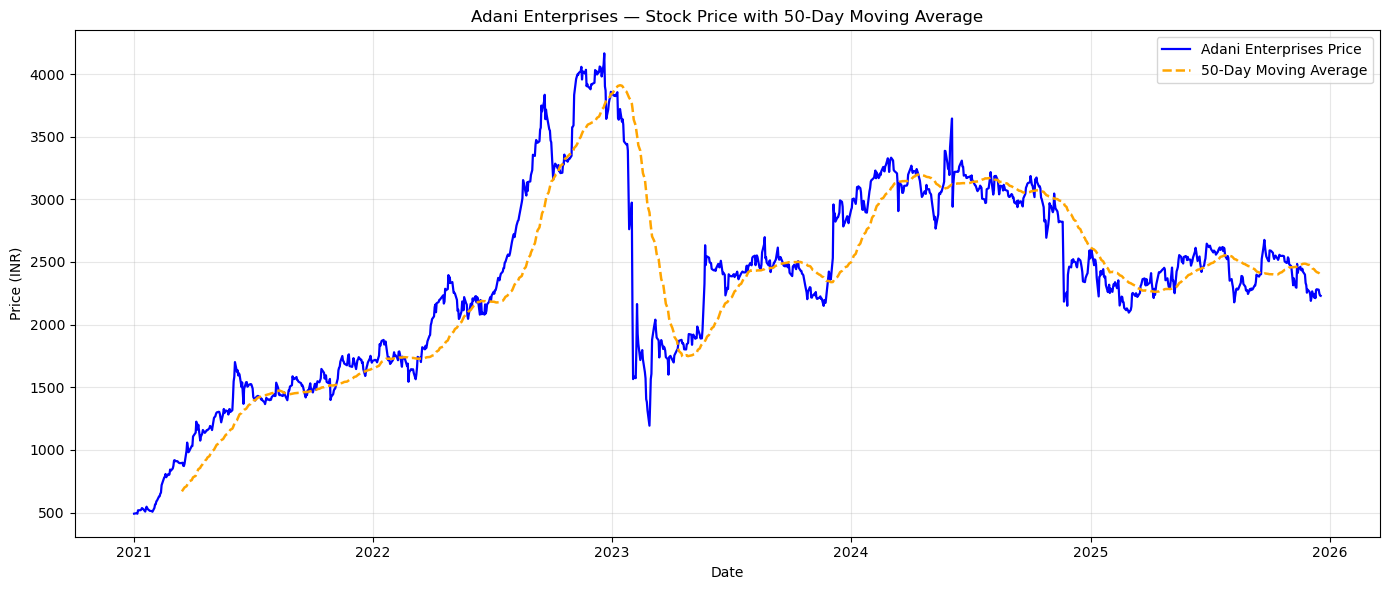

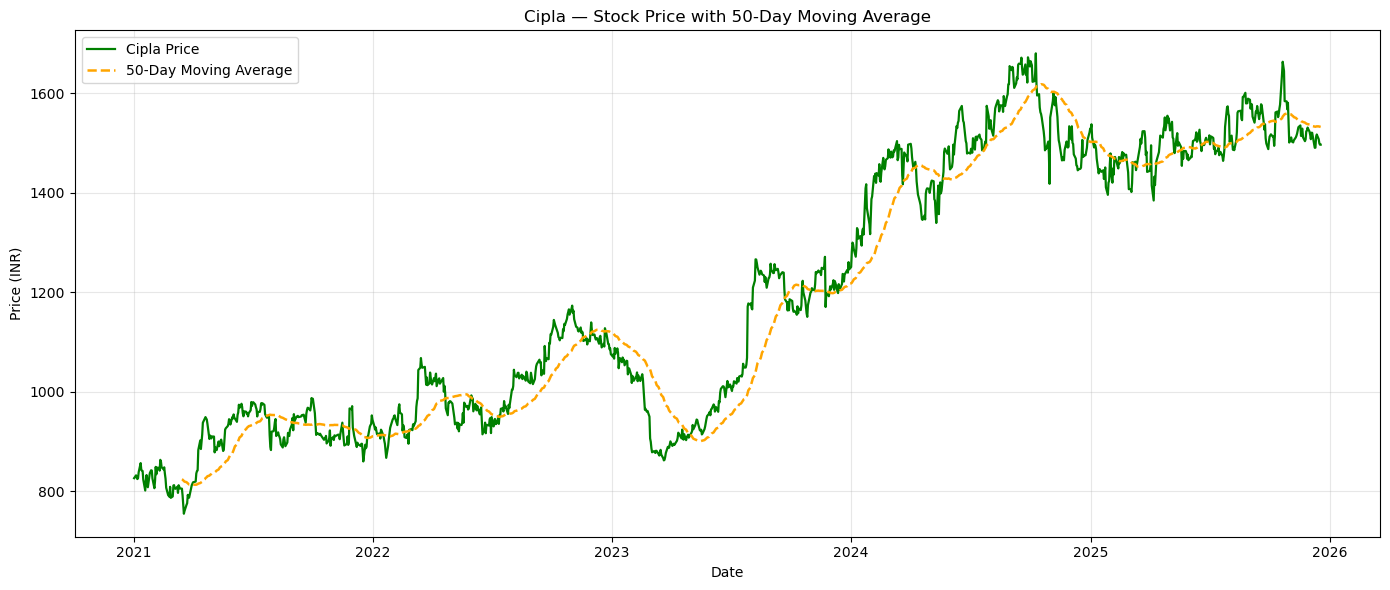

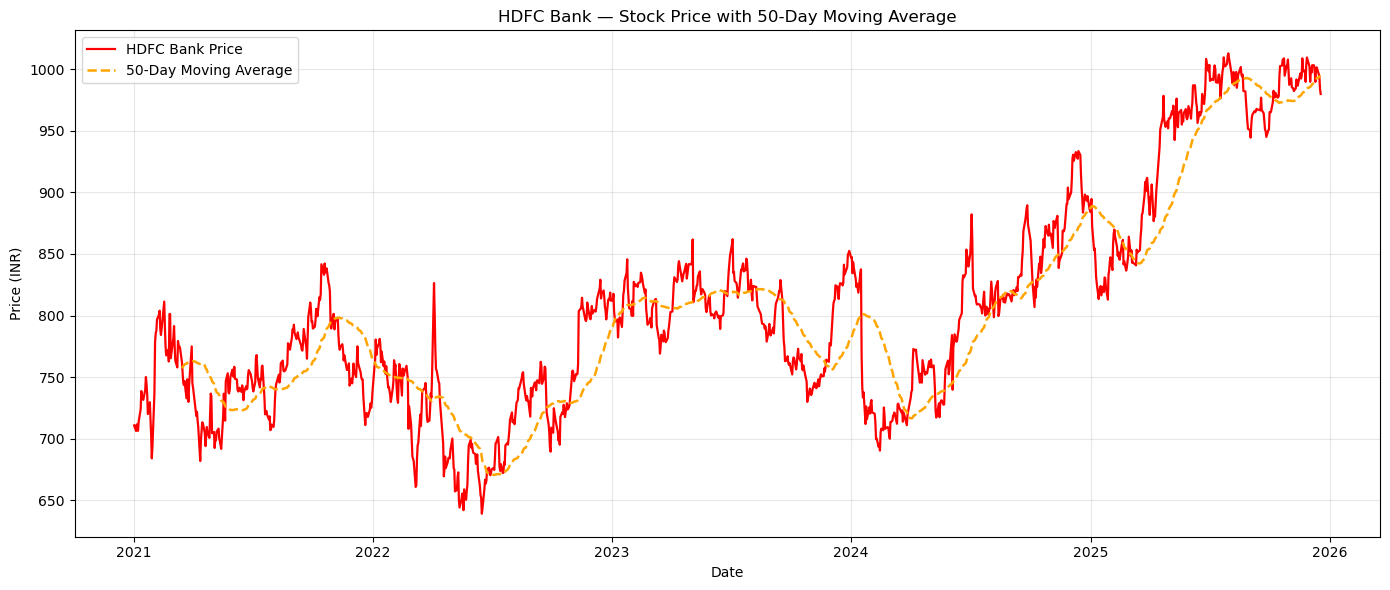

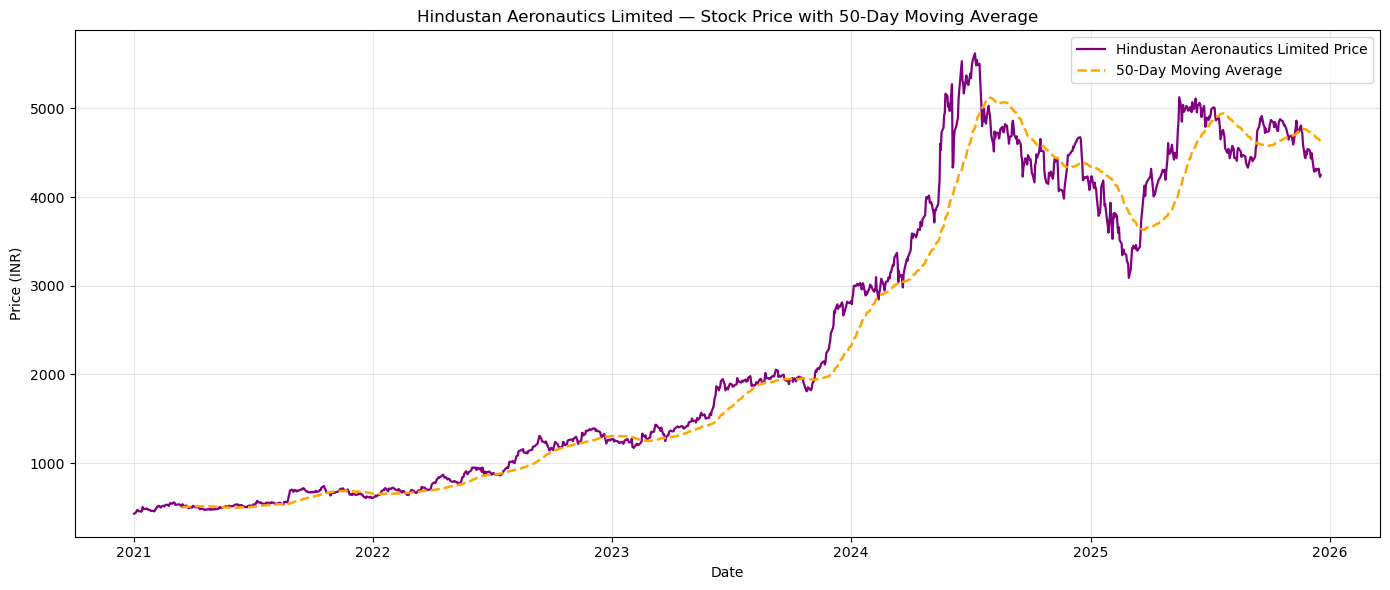

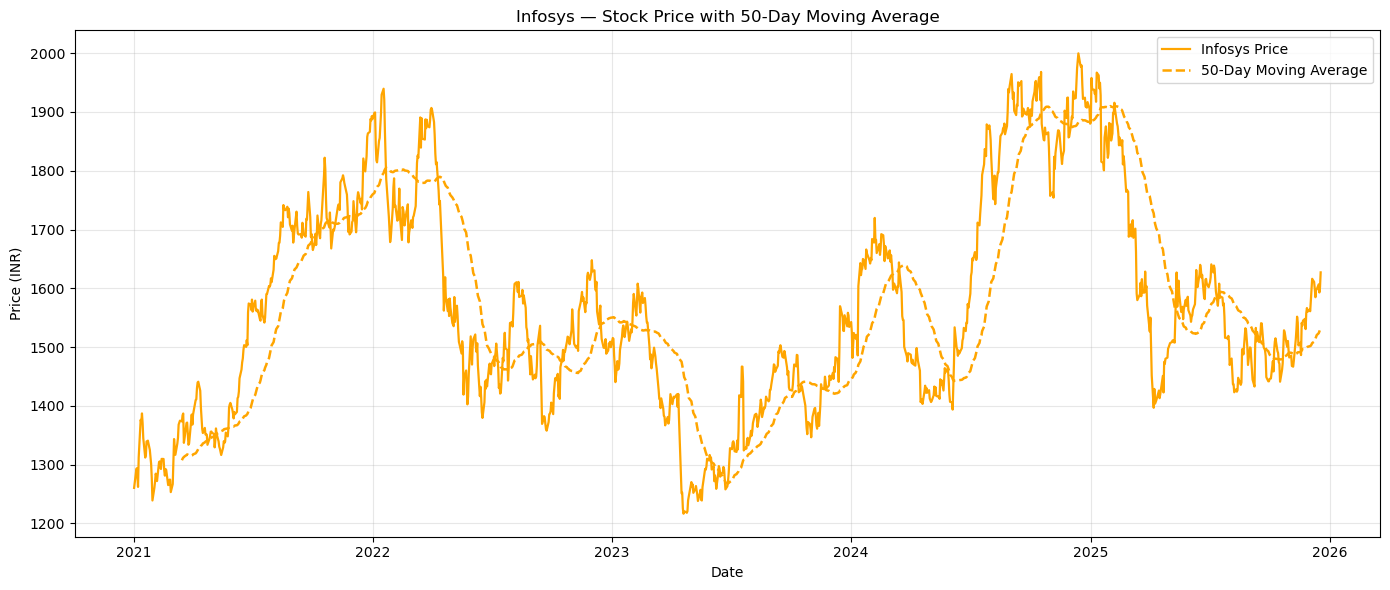

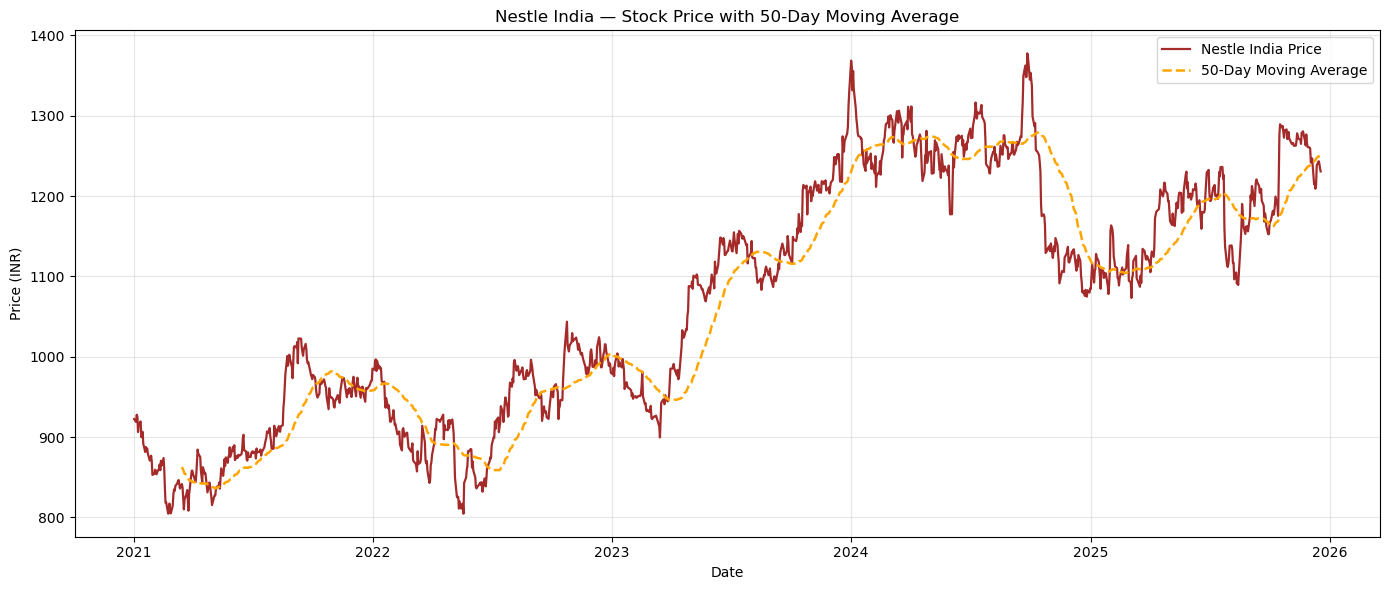

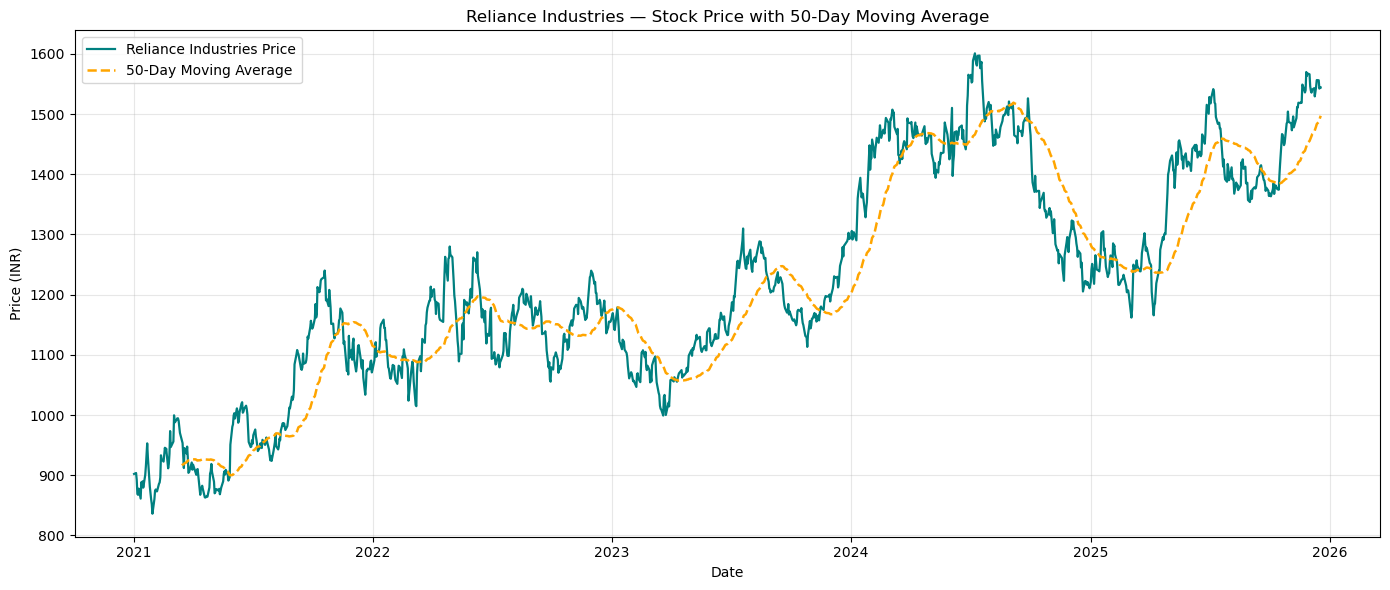

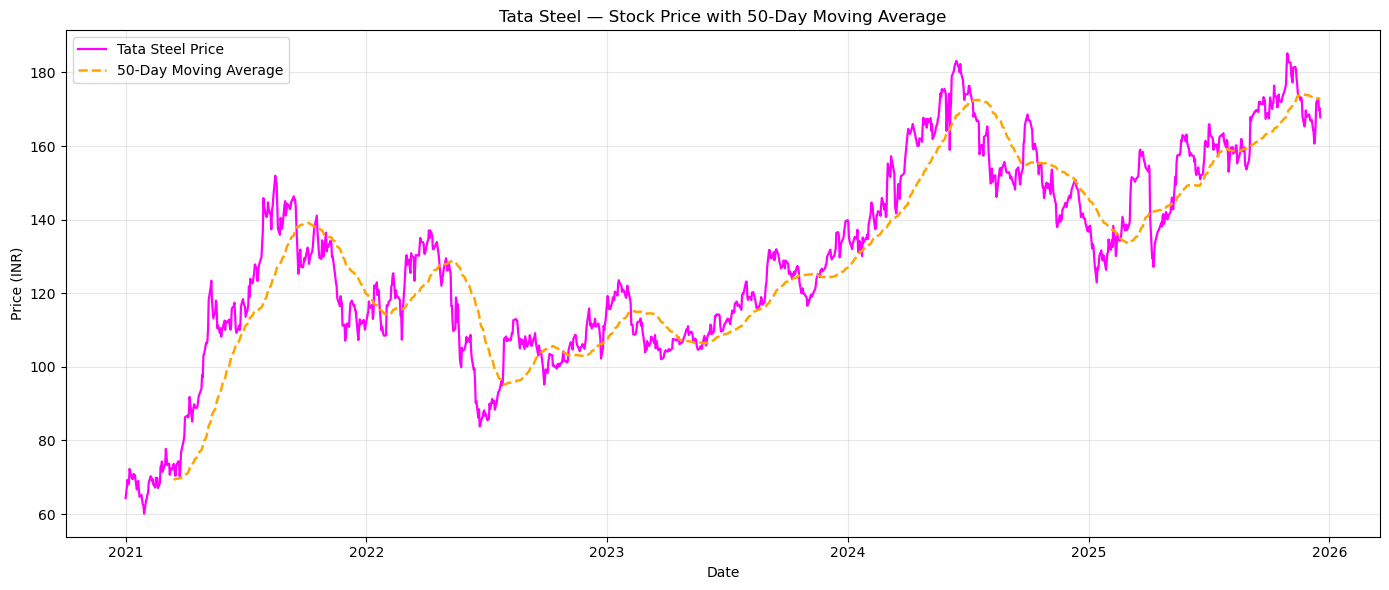

In [4]:

# Color cycle for different stocks
color_cycle = itertools.cycle([
    "blue", "green", "red", "purple", "orange", "brown", "teal", "magenta"
])

for company, df in all_stocks_data.items():
    
    # Pick next color
    stock_color = next(color_cycle)
    
    # Fix Date format
    df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y", errors="coerce")
    
    # Sort dates properly
    df = df.sort_values("Date")
    
    # Calculate moving average
    df["SMA_50"] = df["Price"].rolling(window=50).mean()
    
    # Plot
    plt.figure(figsize=(14, 6))
    
    # Price Line (Different Color)
    plt.plot(df["Date"], df["Price"], 
             label=f"{company} Price", 
             linewidth=1.6, 
             color=stock_color)
    
    # Moving Average Line (Fixed Color)
    plt.plot(df["Date"], df["SMA_50"], 
             linestyle="--", 
             linewidth=1.8, 
             color="orange", 
             label="50-Day Moving Average")
    
    # Titles & Labels
    plt.title(f"{company} — Stock Price with 50-Day Moving Average")
    plt.xlabel("Date")
    plt.ylabel("Price (INR)")
    
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


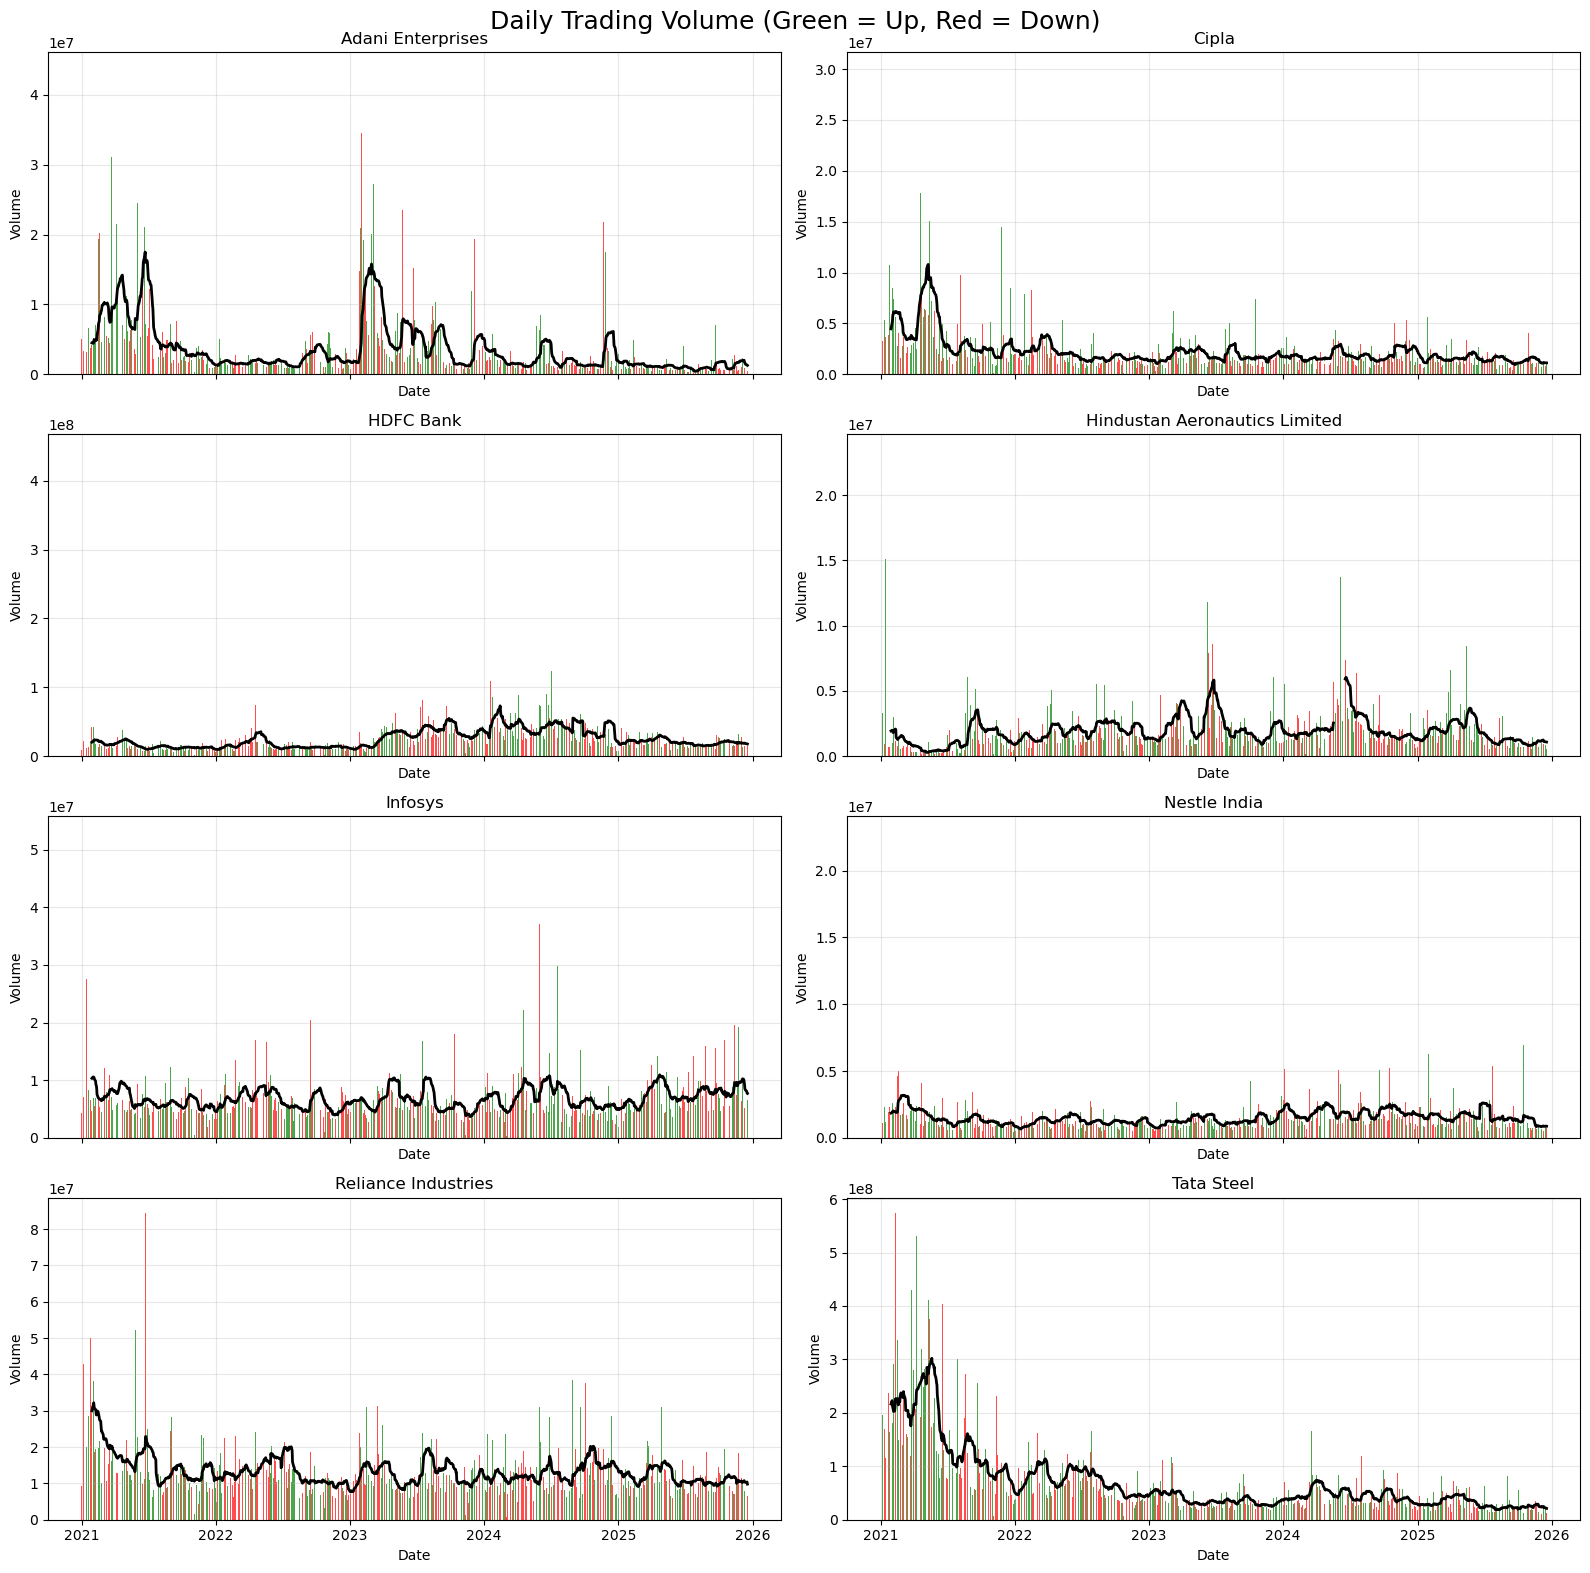

In [5]:
stocks =all_stocks_data 

num_stocks = len(stocks)
cols = 2
rows = (num_stocks + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows), sharex=True)
axes = axes.flatten()

for ax, (name, df) in zip(axes, stocks.items()):
    
    if df is None or "Price" not in df.columns or "Vol." not in df.columns:
        continue
    
    df = df.copy()
    
    # Ensure Date format
    df["Date"] = pd.to_datetime(df.index if "Date" not in df.columns else df["Date"], errors="coerce")
    df = df.sort_values("Date")
    
    # Detect price movement
    df["Prev_Price"] = df["Price"].shift(1)
    
    colors = np.where(df["Price"] >= df["Prev_Price"], "green", "red")
    
    # Volume bars
    ax.bar(df["Date"], df["Vol."], color=colors, alpha=0.7)
    
    # Smooth volume moving average 
    vol_ma = df["Vol."].rolling(20).mean()
    ax.plot(df["Date"], vol_ma, color="black", linewidth=2)
    
    # Styling
    ax.set_title(name, fontsize=12)
    ax.set_ylabel("Volume")
    ax.set_xlabel("Date")
    ax.grid(alpha=0.3)

# Remove unused plots if any
for i in range(len(stocks), len(axes)):
    fig.delaxes(axes[i])

fig.suptitle("Daily Trading Volume (Green = Up, Red = Down)", fontsize=18)
# plt.xlabel("Date")
plt.tight_layout()
plt.show()


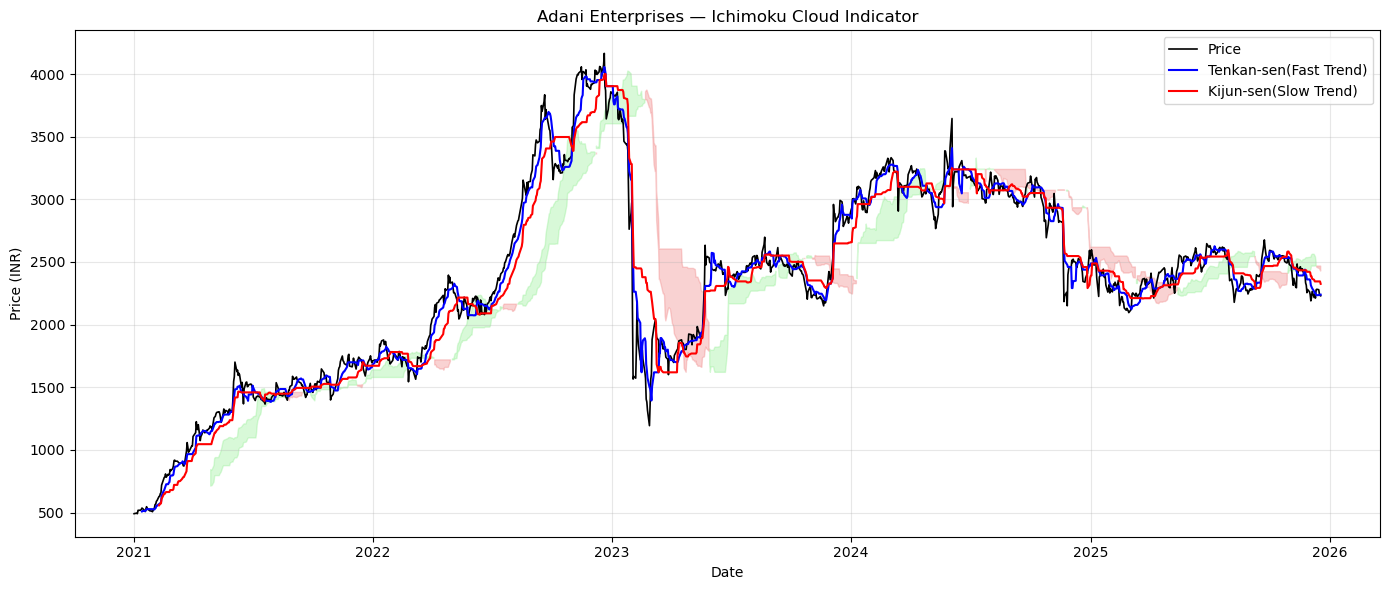

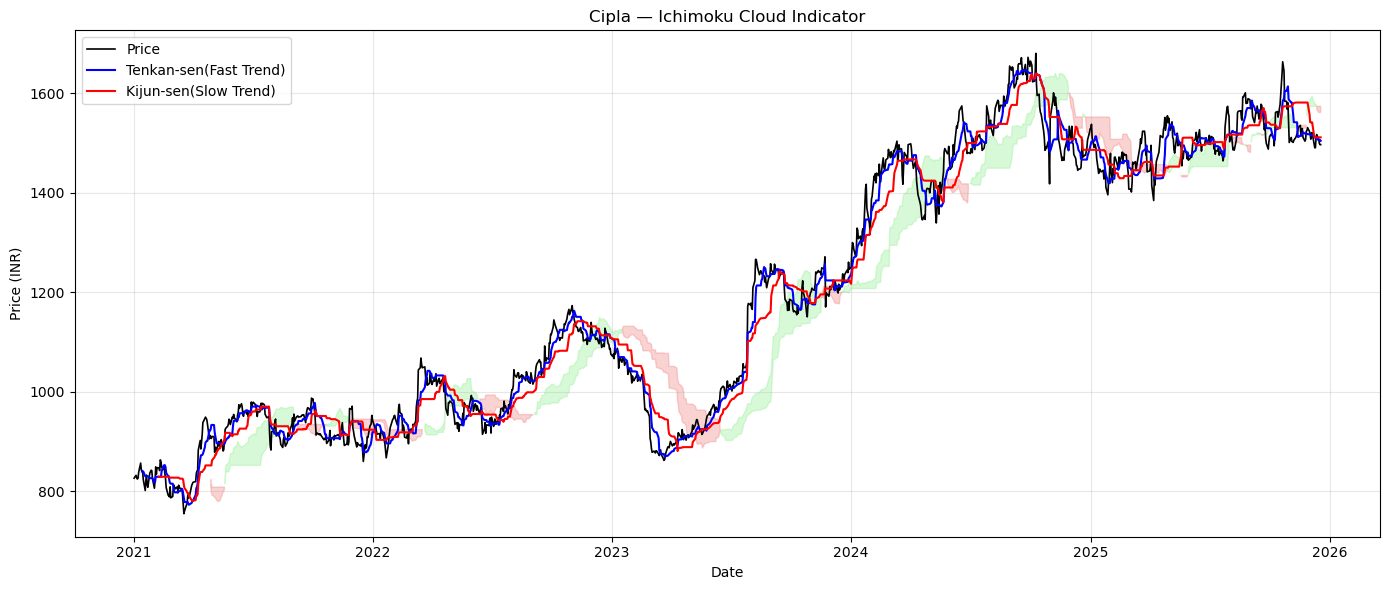

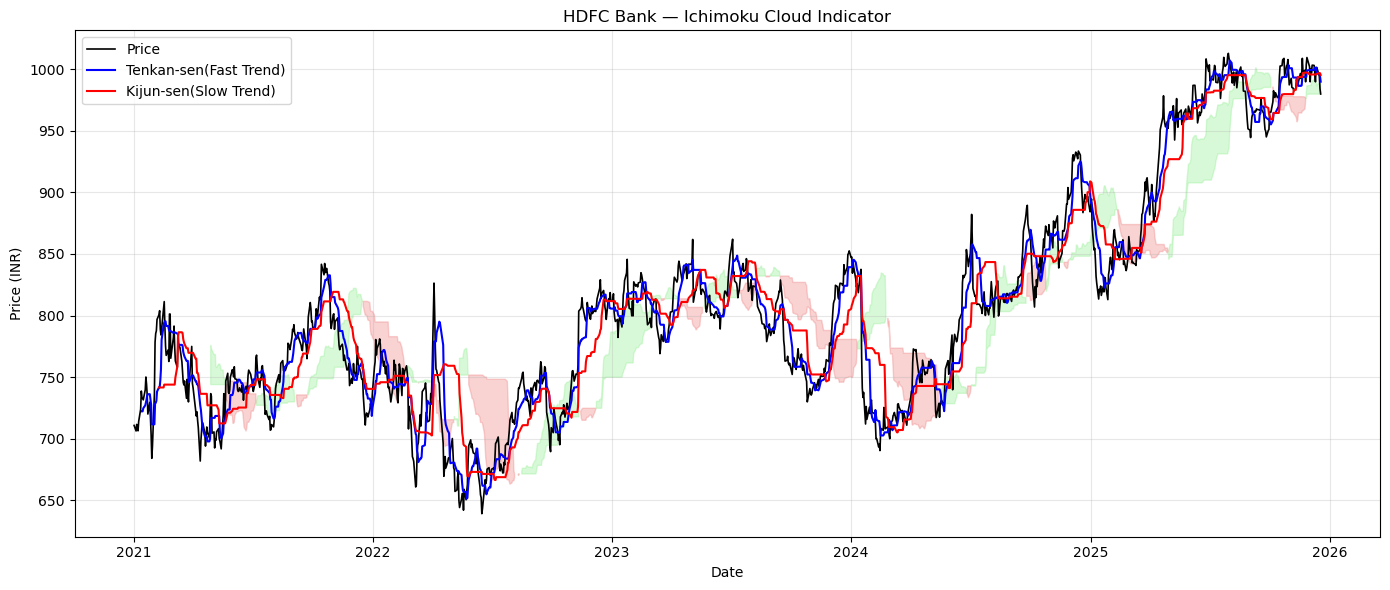

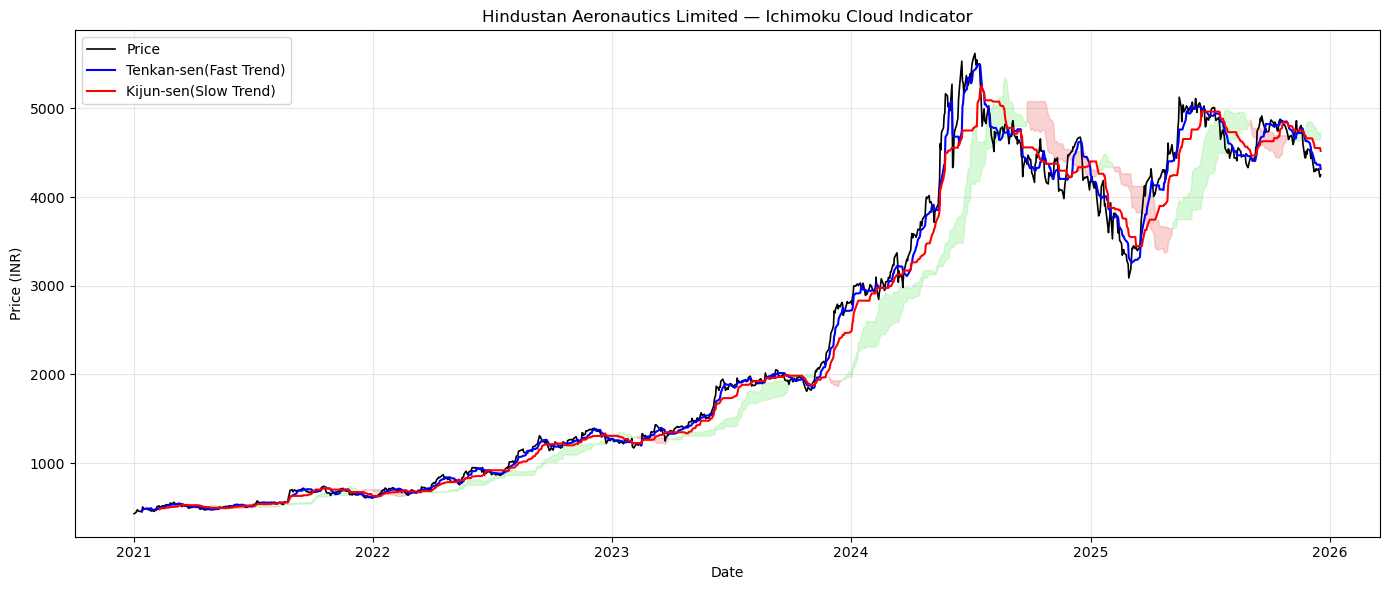

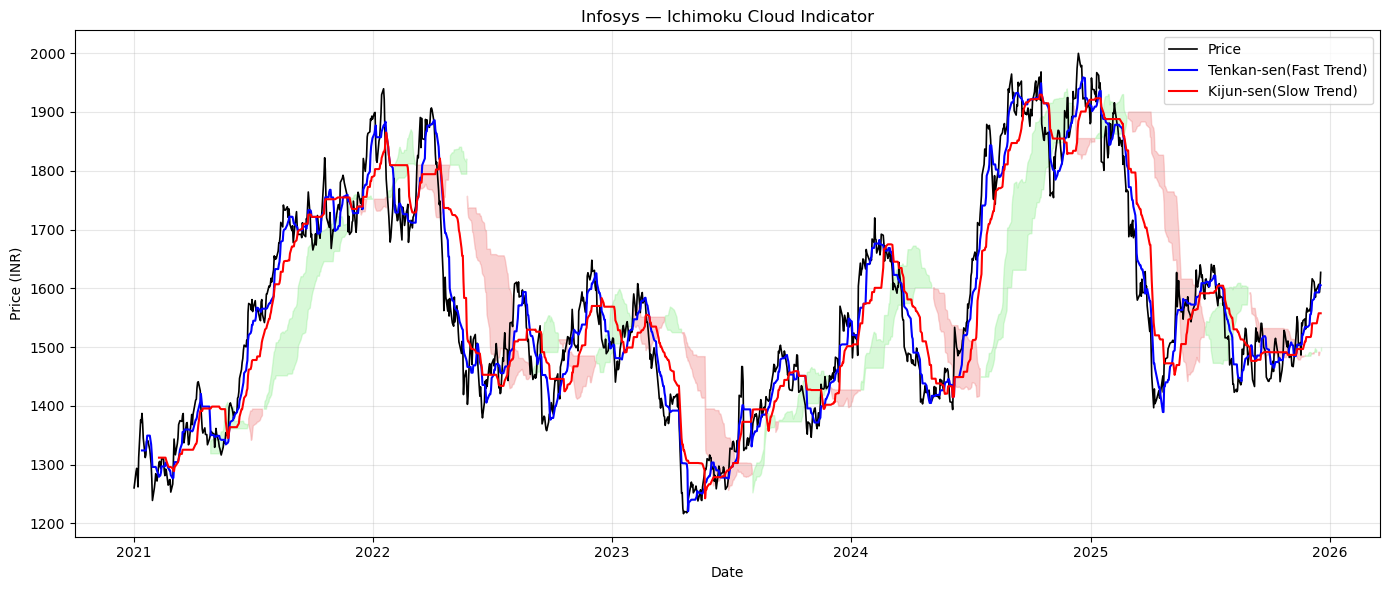

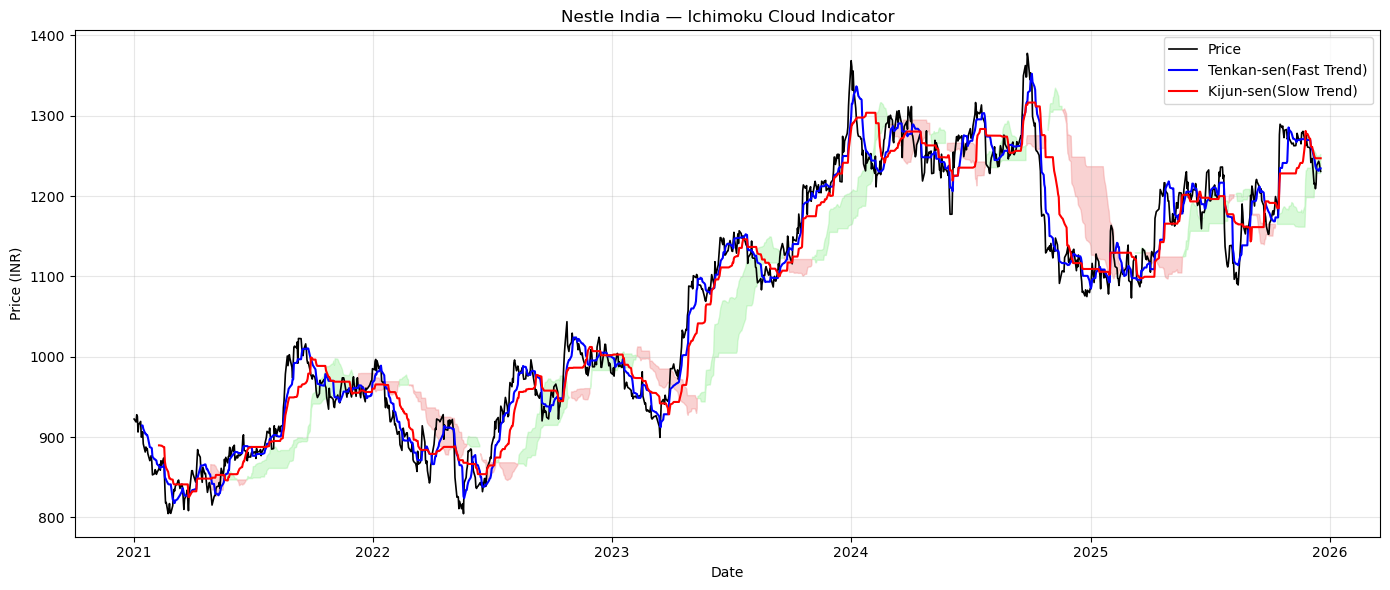

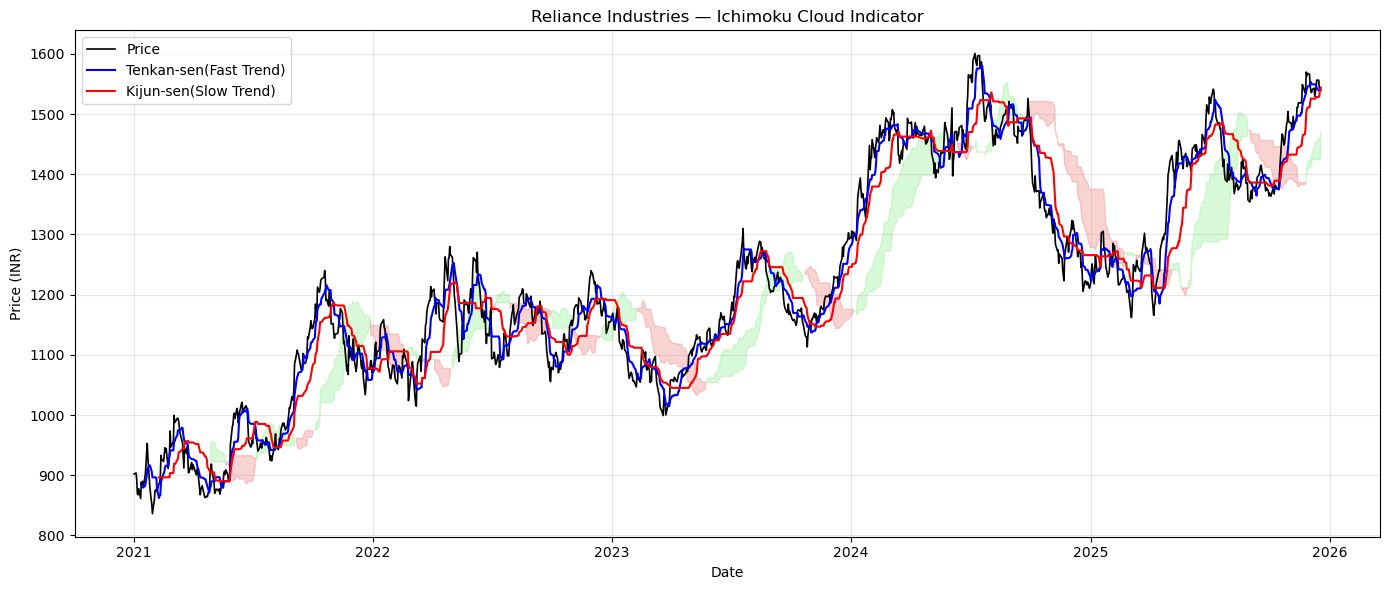

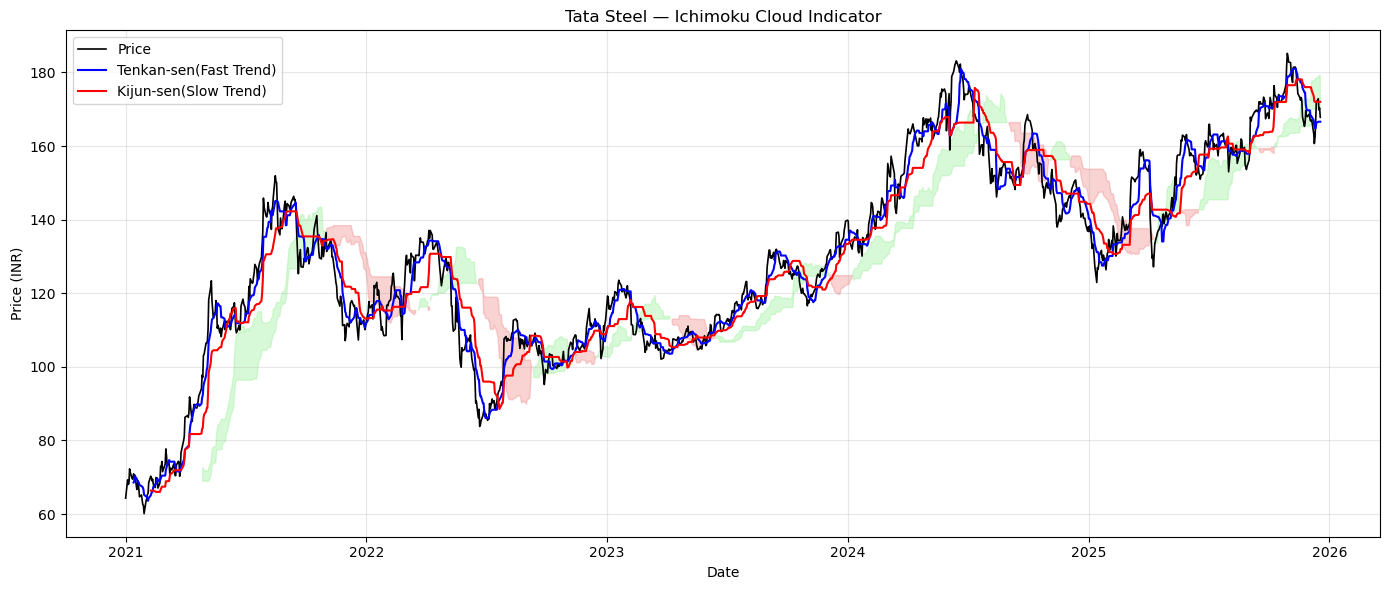

In [6]:
for company, df in all_stocks_data.items():
    
    df = df.copy()
    
    # Fix Date
    df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y", errors="coerce")
    df = df.sort_values("Date")
    
    high = df["High"]
    low = df["Low"]
    close = df["Price"]
    
    # Ichimoku Lines
    df["Tenkan"] = (high.rolling(9).max() + low.rolling(9).min()) / 2
    df["Kijun"] = (high.rolling(26).max() + low.rolling(26).min()) / 2
    df["Senkou_A"] = ((df["Tenkan"] + df["Kijun"]) / 2).shift(26)
    df["Senkou_B"] = ((high.rolling(52).max() + low.rolling(52).min()) / 2).shift(26)
    
    # Plot
    plt.figure(figsize=(14, 6))
    
    # Price
    plt.plot(df["Date"], close, color="black", linewidth=1.2, label="Price")
    
    # Ichimoku Lines
    plt.plot(df["Date"], df["Tenkan"], color="blue", label="Tenkan-sen(Fast Trend)")
    plt.plot(df["Date"], df["Kijun"], color="red", label="Kijun-sen(Slow Trend)")
    
    # Cloud Fill
    plt.fill_between(
        df["Date"], df["Senkou_A"], df["Senkou_B"],
        where=df["Senkou_A"] >= df["Senkou_B"],
        color="lightgreen", alpha=0.35
    )
    
    plt.fill_between(
        df["Date"], df["Senkou_A"], df["Senkou_B"],
        where=df["Senkou_A"] < df["Senkou_B"],
        color="lightcoral", alpha=0.35
    )
    
    # Styling
    plt.title(f"{company} — Ichimoku Cloud Indicator")
    plt.xlabel("Date")
    plt.ylabel("Price (INR)")
    plt.legend()
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()


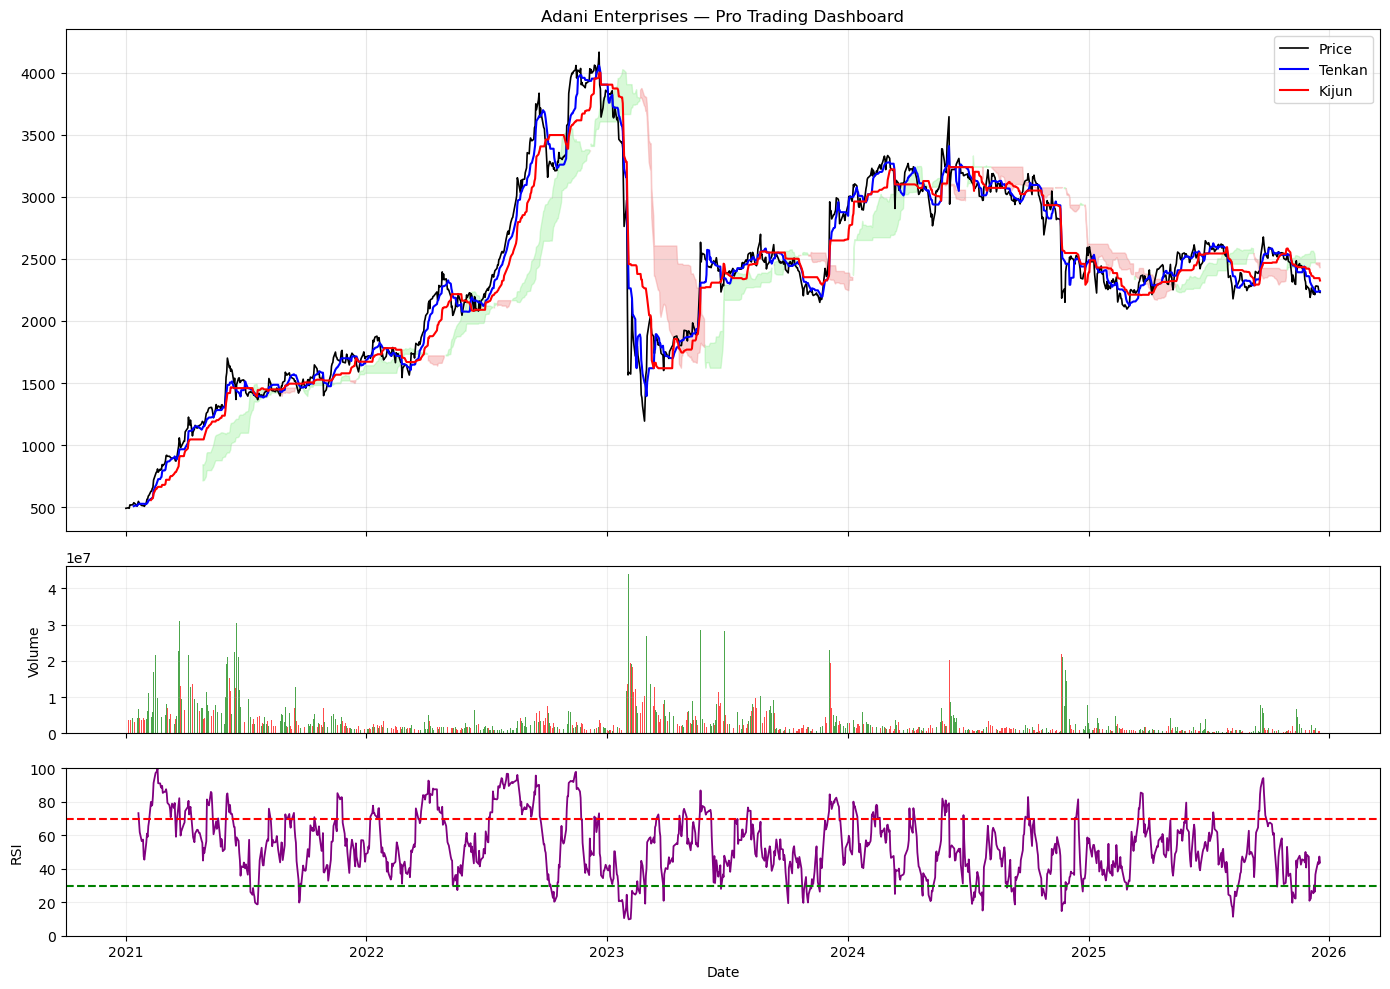

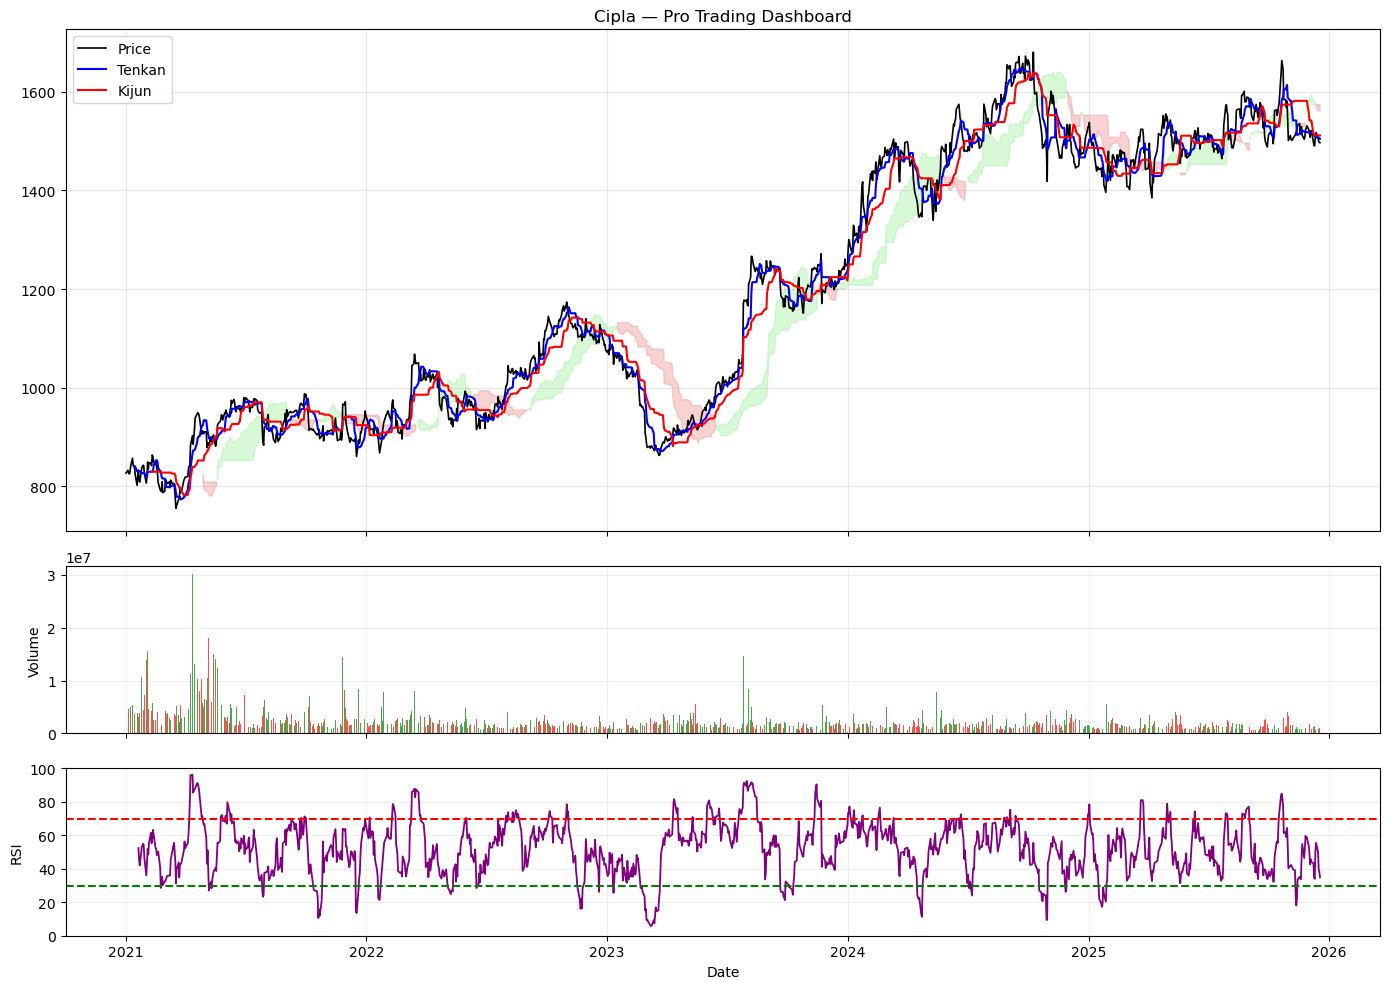

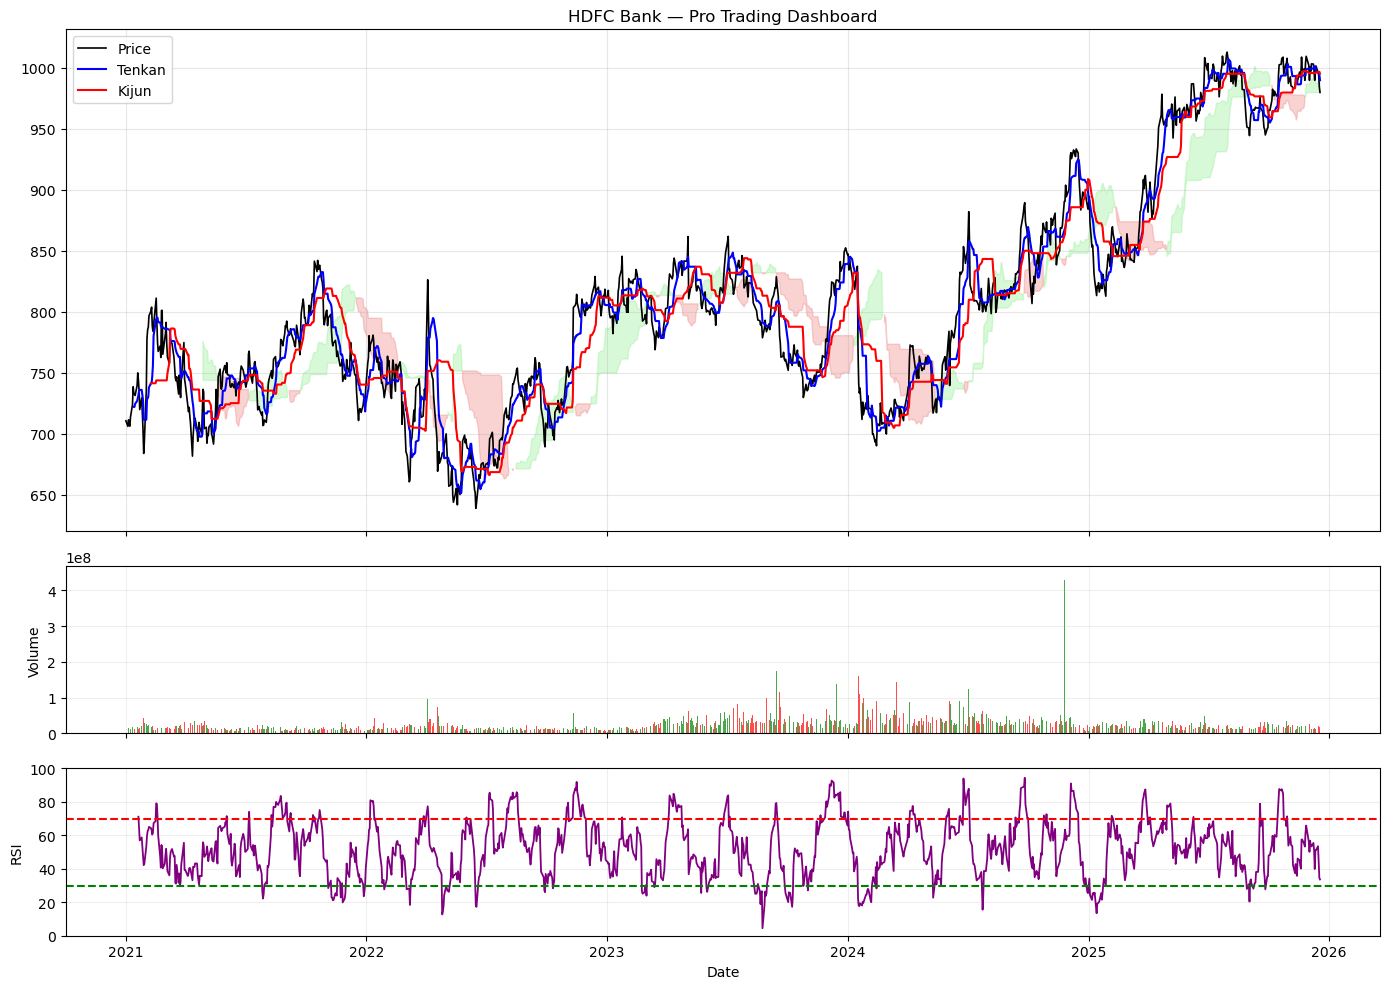

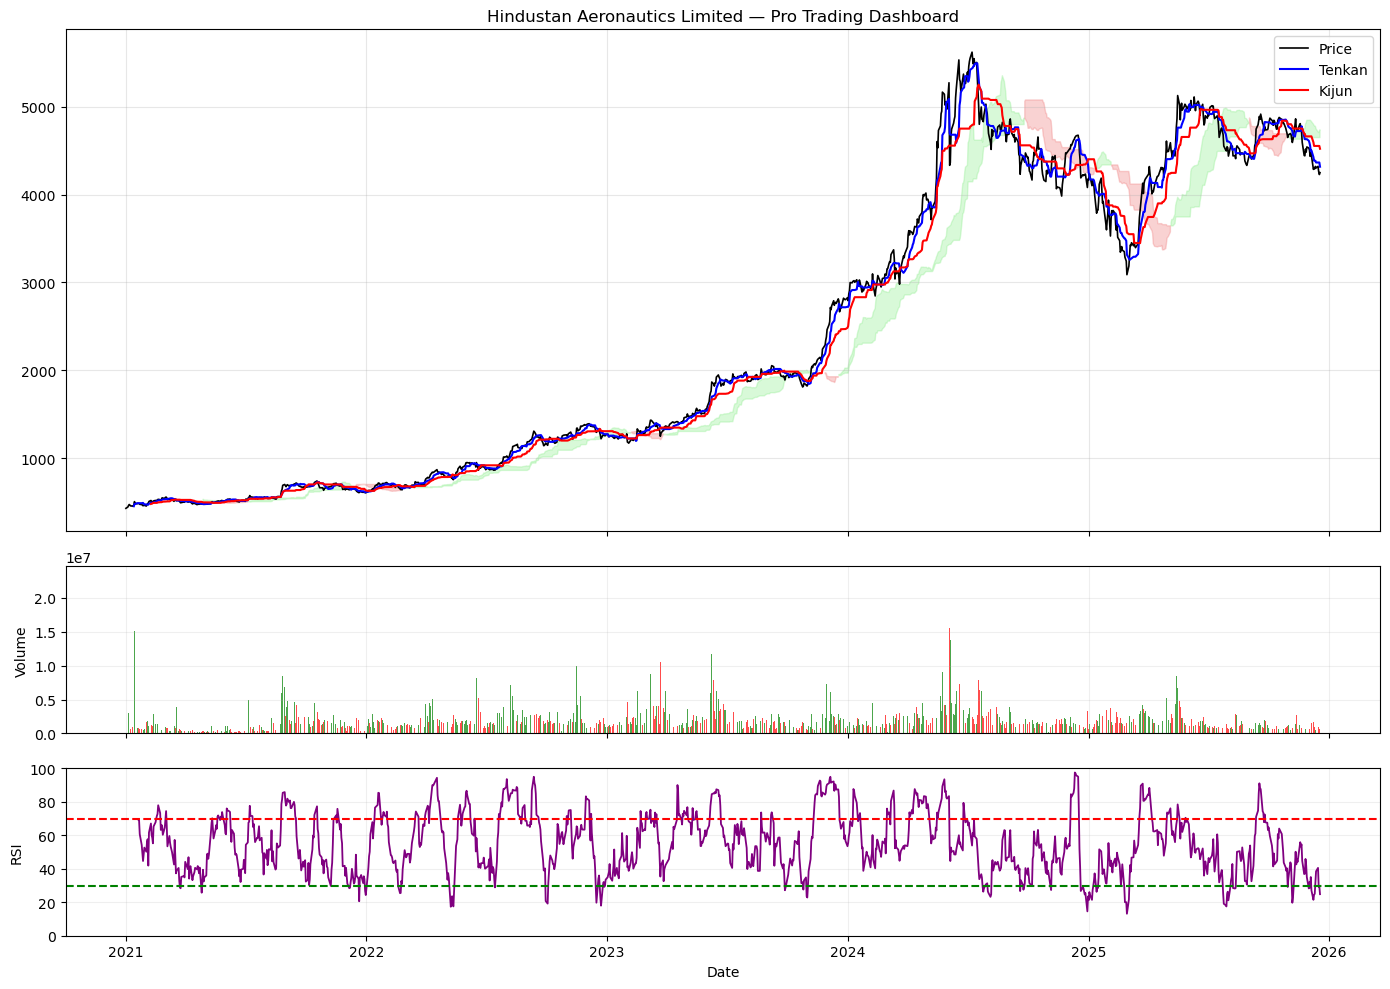

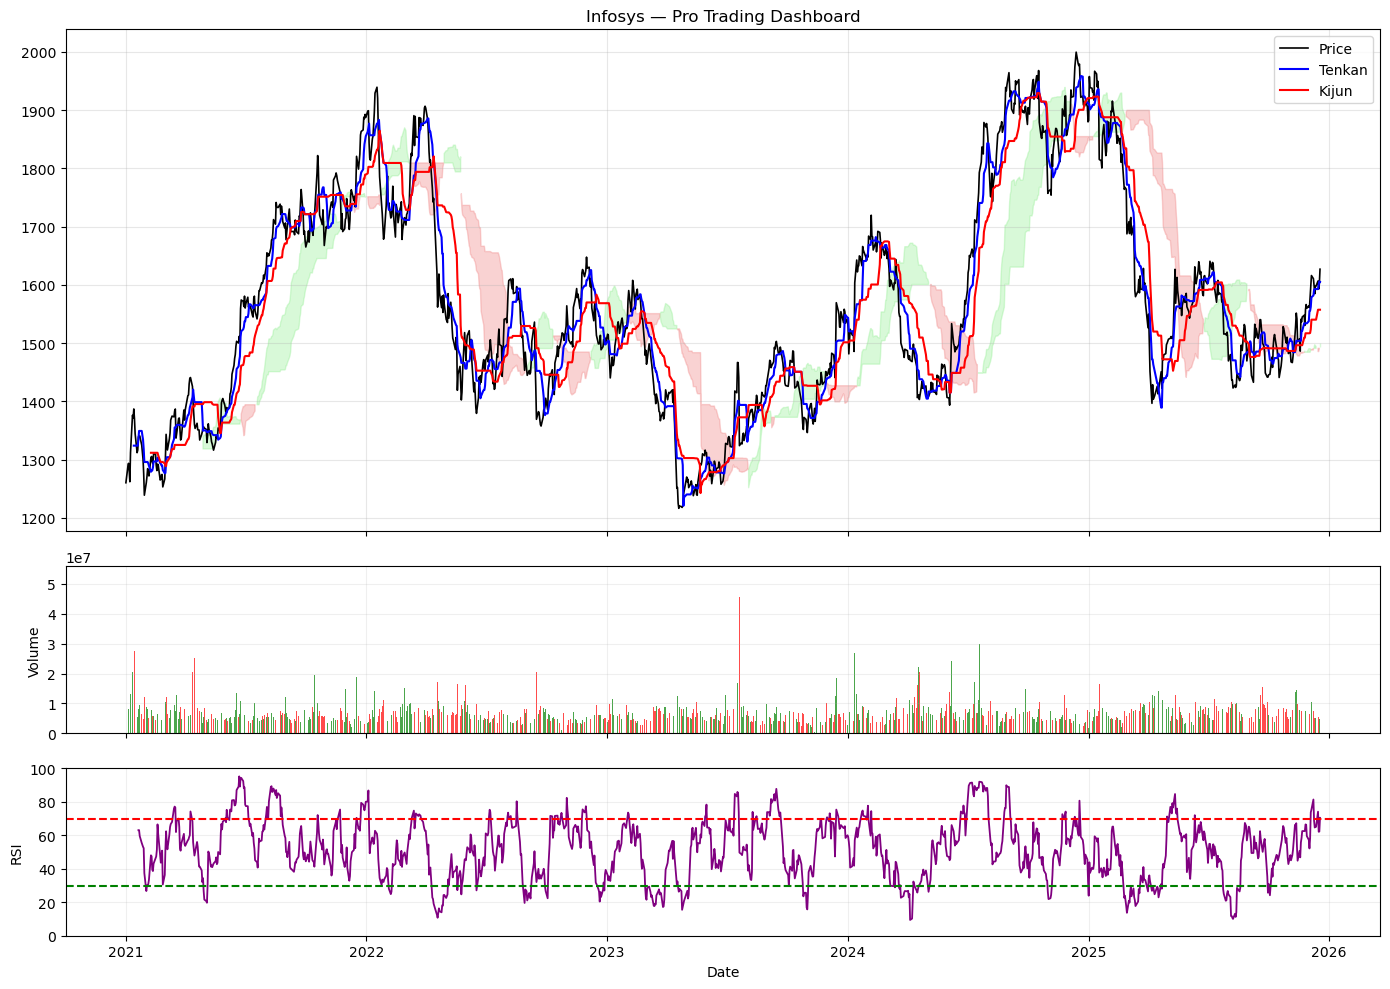

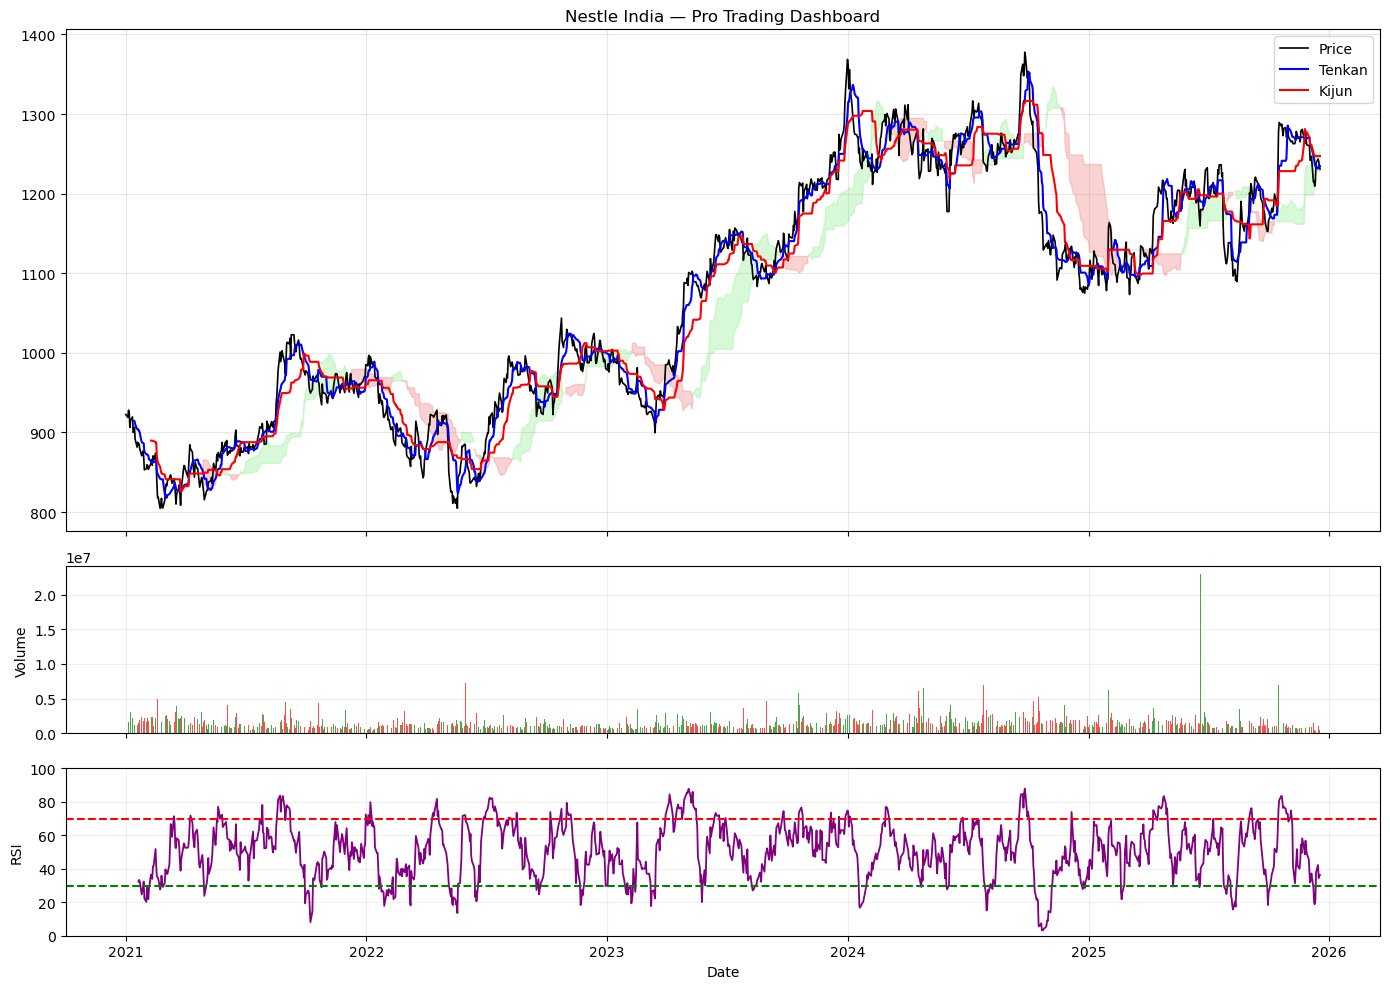

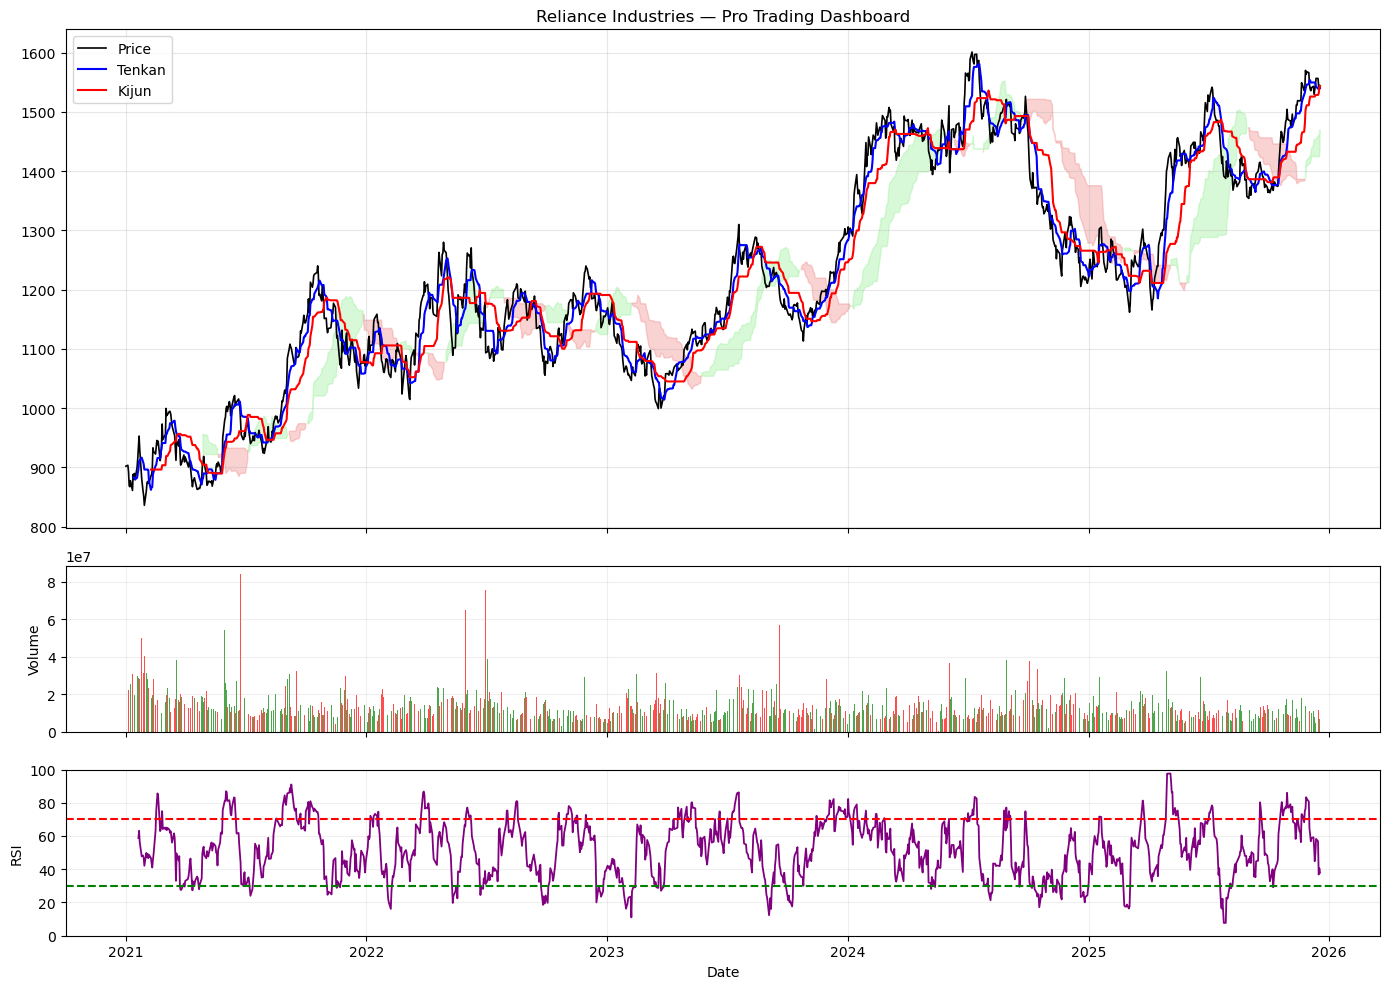

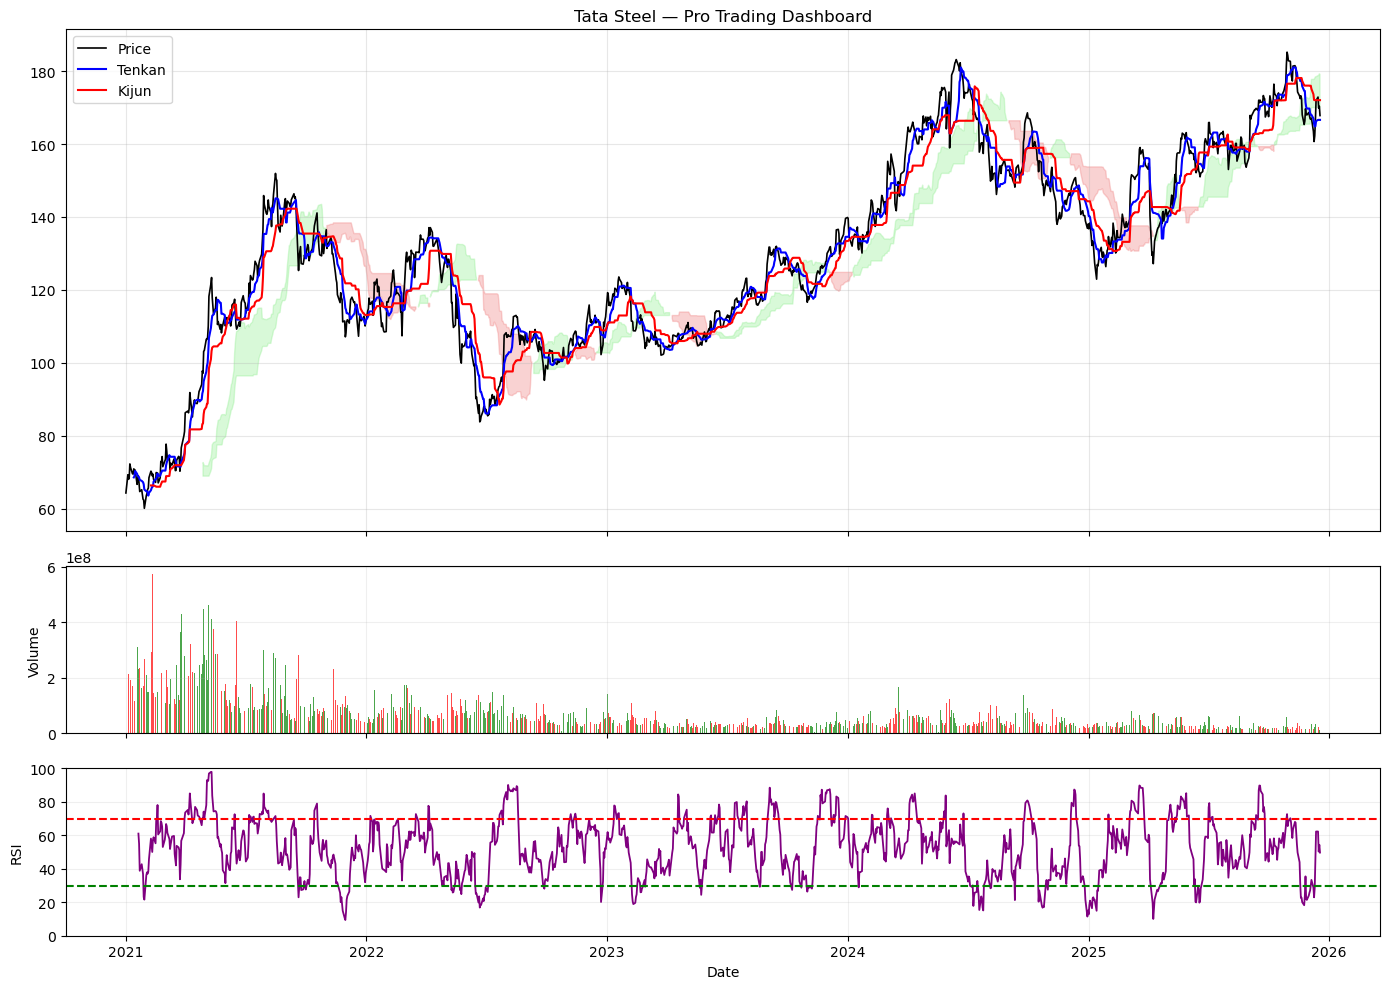

In [ ]:

for company, df in all_stocks_data.items():
    
    df = df.copy()
    
    # Fix Date
    df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y", errors="coerce")
    df = df.sort_values("Date")
    
    # -------------------------
    # ICHIMOKU CLOUD
    # -------------------------
    high = df["High"]
    low = df["Low"]
    close = df["Price"]
    
    df["Tenkan"] = (high.rolling(9).max() + low.rolling(9).min()) / 2
    df["Kijun"] = (high.rolling(26).max() + low.rolling(26).min()) / 2
    df["Senkou_A"] = ((df["Tenkan"] + df["Kijun"]) / 2).shift(26)
    df["Senkou_B"] = ((high.rolling(52).max() + low.rolling(52).min()) / 2).shift(26)
    
    # -------------------------
    # RSI
    # -------------------------
    delta = close.diff()
    gain = delta.where(delta > 0, 0).rolling(14).mean()
    loss = -delta.where(delta < 0, 0).rolling(14).mean()
    rs = gain / loss
    df["RSI"] = 100 - (100 / (1 + rs))
    
    # -------------------------
    # VOLUME COLORS
    # -------------------------
    df["Prev_Price"] = close.shift(1)
    volume_colors = np.where(close >= df["Prev_Price"], "green", "red")
    
    # -------------------------
    # CREATE DASHBOARD LAYOUT
    # -------------------------
    fig, (ax1, ax2, ax3) = plt.subplots(
        3, 1, figsize=(14, 10),
        gridspec_kw={"height_ratios": [3, 1, 1]},
        sharex=True
    )
    
    # -------------------------
    # PRICE + ICHIMOKU CLOUD
    # -------------------------
    ax1.plot(df["Date"], close, color="black", linewidth=1.2, label="Price")
    ax1.plot(df["Date"], df["Tenkan"], color="blue", label="Tenkan")
    ax1.plot(df["Date"], df["Kijun"], color="red", label="Kijun")
    
    ax1.fill_between(
        df["Date"], df["Senkou_A"], df["Senkou_B"],
        where=df["Senkou_A"] >= df["Senkou_B"],
        color="lightgreen", alpha=0.35
    )
    
    ax1.fill_between(
        df["Date"], df["Senkou_A"], df["Senkou_B"],
        where=df["Senkou_A"] < df["Senkou_B"],
        color="lightcoral", alpha=0.35
    )
    
    ax1.set_title(f"{company} — Pro Trading Dashboard")
    ax1.legend()
    ax1.grid(alpha=0.3)
    
    # -------------------------
    # VOLUME PANEL
    # -------------------------
    ax2.bar(df["Date"], df["Vol."], color=volume_colors, alpha=0.7)
    ax2.set_ylabel("Volume")
    ax2.grid(alpha=0.2)
    
    # -------------------------
    # RSI PANEL
    # -------------------------
    ax3.plot(df["Date"], df["RSI"], color="purple", linewidth=1.3)
    ax3.axhline(70, linestyle="--", color="red")
    ax3.axhline(30, linestyle="--", color="green")
    ax3.set_ylabel("RSI")
    ax3.set_ylim(0, 100)
    ax3.grid(alpha=0.2)
    
    plt.xlabel("Date")
    plt.tight_layout()
    plt.show()
